In [1]:
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats

# To remove outliers
from scipy.stats import zscore

#importing nltk libraries
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

# Evaluation Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,accuracy_score,roc_auc_score,hamming_loss, log_loss

# Warning
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Reading csv file 

df = pd.read_csv("Ratings prediction.csv")
df

,Unnamed: 0,Review_Title,Review_Text,Ratings
0,0,Think twice before going for it,\n &nbsp;Pros<br>-----<br>- Very light weight...,2.0 out of 5 stars
1,1,Overpriced,\n Overpriced for this mediocre product with ...,2.0 out of 5 stars
2,2,Build quality is not as good as shown in the Ad,\n Did not meet expectations:<br>Takes signif...,3.0 out of 5 stars
3,3,Speed and Visuals makes this a power machine!,\n The speakers and sound quality are patheti...,3.0 out of 5 stars
4,4,Overpriced and unreliable,\n For just i5 11th gen this laptop is way ov...,3.0 out of 5 stars
...,...,...,...,...
114486,114486,Waste of money!,It is worse screen was damaged,1
114487,114487,Nice,Good,3
114488,114488,Could be way better,Poor quality...,2
114489,114489,Just wow!,Good product,5


# EXPLORATORY DATA ANALYSIS

Since Unnamed: 0 is the index column of csv file so let's drop that column as it will not help us in our predictions.



In [3]:
# Dropping unnecessary column

df.drop(columns = 'Unnamed: 0',inplace = True)
# Checking the shape of the dataset

print("There are {} Rows and {} Columns in the dataset".format(df.shape[0], df.shape[1]))

There are 114491 Rows and 3 Columns in the dataset


In [4]:
# Checking the column names in the dataset

print("Columns present in the dataset are:\n",df.columns)

Columns present in the dataset are:
 Index(['Review_Title', 'Review_Text', 'Ratings'], dtype='object')


In [5]:
# Let's check the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114491 entries, 0 to 114490
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Review_Title  98879 non-null   object
 1   Review_Text   100658 non-null  object
 2   Ratings       98880 non-null   object
dtypes: object(3)
memory usage: 2.6+ MB


By observing the info we can say that there are some null values in the dataset and all the columns are of object data type which means all the entries are string entries.

In [6]:
# Checking for null values

print("Null values in the dataset: \n", df.isnull().sum())

Null values in the dataset: 
 Review_Title    15612
Review_Text     13833
Ratings         15611
dtype: int64


So we have a huge number of nan values in the dataset. Let's replace them using imputation methods.


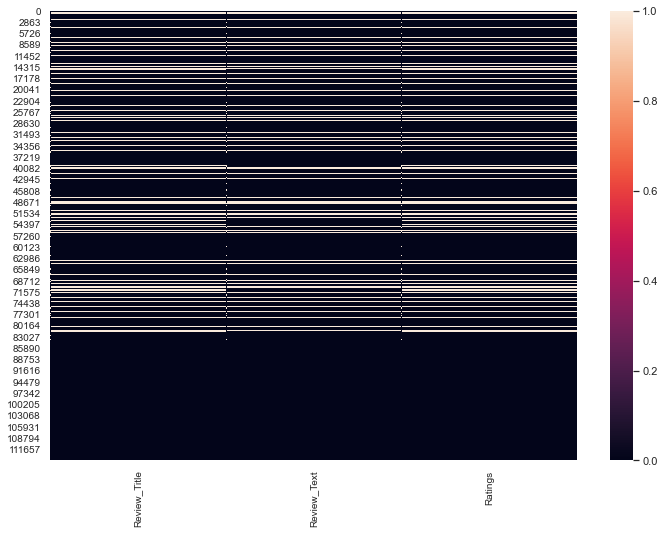

In [7]:
# Let's visualize the null values clearly in dataset using heat map

sns.set(rc={'figure.figsize':(11.8,8.27)})
sns.heatmap(data=df.isnull())
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()


Now we can clearly visualize on null values

# Replacing Nan values by using Imputation Method

In [8]:
#Checking the mode of Review_Title column

df["Review_Title"].mode()

0    Wonderful
dtype: object

So the highest occuring Review_Title is Wonderful, we have to replace the nan values in Review_Title column with it's mode.

In [9]:
#Checking the mode of Review_Text column

df["Review_Text"].mode()

0    Good
dtype: object

So the highest occuring Review_Text is Good, we have to replace the nan values in Review_Text column with it's mode

In [10]:
#Checking the value counts of Ratings column

df.Ratings.value_counts()

5                     19085
5.0 out of 5 stars    16301
1.0 out of 5 stars    14598
4.0 out of 5 stars    14261
3.0 out of 5 stars    12313
2.0 out of 5 stars    10726
4                      6470
1                      2249
3                      2098
2                       779
Name: Ratings, dtype: int64

Since the highes count in Ratings column is for 5 followed by 5.0 out of 5 starts and they both are same so it is clear the mode for Ratings column is 5.


In [11]:
#Checking the mode

df["Ratings"].mode()

0    5
dtype: object

In [12]:
#Replacing naa values with there mode as all the columns are categorical

df["Review_Title"] = df["Review_Title"].fillna(df["Review_Title"].mode()[0])
df["Review_Text"] = df["Review_Text"].fillna(df["Review_Text"].mode()[0])
df["Ratings"] = df["Ratings"].fillna(df["Ratings"].mode()[0])


In [13]:
# Checking for null values again

print("Null values in the dataset: \n", df.isnull().sum())

Null values in the dataset: 
 Review_Title    0
Review_Text     0
Ratings         0
dtype: int64


Now successfully we have replaced all the nan values using imputation method.


Let's look into target column

In [14]:
# Checking the unique value count of target column

df['Ratings'].unique()

array(['2.0 out of 5 stars', '3.0 out of 5 stars', '1.0 out of 5 stars',
       '5.0 out of 5 stars', '5', '4.0 out of 5 stars', '4', '3', '1',
       '2'], dtype=object)

Looking the above entries in target column we came to know that we need to replace the string entries to there respective values(stars).


In [15]:
# Replacing the string entries in target column

df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)
df['Ratings'] = df['Ratings'].astype('int')

In [16]:
# Checking the unique value count of target column again

df['Ratings'].unique()

array([2, 3, 1, 5, 4])

Now the target column looks good for our analysis.


# Now let's combine Review_Title and Review_Text to make a single column Review:


In [17]:
# Combining Review text and title

df['Review'] = df['Review_Title'].map(str)+' '+df['Review_Text']

In [18]:
#let's have a look into our dataset

df

,Review_Title,Review_Text,Ratings,Review
0,Think twice before going for it,\n &nbsp;Pros<br>-----<br>- Very light weight...,2,Think twice before going for it \n &nbsp;Pros...
1,Overpriced,\n Overpriced for this mediocre product with ...,2,Overpriced \n Overpriced for this mediocre pr...
2,Build quality is not as good as shown in the Ad,\n Did not meet expectations:<br>Takes signif...,3,Build quality is not as good as shown in the A...
3,Speed and Visuals makes this a power machine!,\n The speakers and sound quality are patheti...,3,Speed and Visuals makes this a power machine! ...
4,Overpriced and unreliable,\n For just i5 11th gen this laptop is way ov...,3,Overpriced and unreliable \n For just i5 11th...
...,...,...,...,...
114486,Waste of money!,It is worse screen was damaged,1,Waste of money! It is worse screen was damaged
114487,Nice,Good,3,Nice Good
114488,Could be way better,Poor quality...,2,Could be way better Poor quality...
114489,Just wow!,Good product,5,Just wow! Good product


Since we have obtained Review from Review_Title and Review_Text let's drop Review_Title and Review_Text. If not they'll create multicollinearity issue.


In [19]:
# Dropping unnecessary column

df.drop(columns = 'Review_Title',inplace = True)
df.drop(columns = 'Review_Text',inplace = True)

# Let's have a look into our Review column and see first 2 entries how the data looks:


In [20]:
# Checking data of first row in Review column

df['Review'][0]

"Think twice before going for it \n  &nbsp;Pros<br>-----<br>- Very light weight<br>- Screen brightness and clarity is awesome<br><br>Cons<br>------<br>- Speaker quality is horrible. Cannot use for calls at all. Crackling noise takes you to vinyl days.<br>- Body is not sturdy. The piece I received was slightly bent at the base, making the laptop wobble when I type.<br>- The bottom screw was hanging out with the thread gone due to incorrect tightening (so much for Japanese craftmanship)<br><br>Recommend to not purchase. It's not worth at this price point.\n"

In [21]:
# Checking data of second row in Review column

df['Review'][1]

'Overpriced \n  Overpriced for this mediocre product with no brand value, better to check out other products in reputed brands like dell, Hp, Asus\n'

# TEXT PROCESSING

In [22]:
#Here I am defining a function to replace some of the contracted words to their full form and removing urls and some unwanted text 

def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

In [23]:
# Changing all words to there Lowercase

df['Review'] = df['Review'].apply(lambda x : x.lower())

df['Review'] = df['Review'].apply(lambda x : decontracted(x))

# Removing punctuations

df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'] = df['Review'].str.replace('\n',' ')

In [24]:
# Checking data of first row in Review column again

df['Review'][0]

'think twice before going for it    nbsppros   very light weight  screen brightness and clarity is awesome  cons   speaker quality is horrible cannot use for calls at all crackling noise takes you to vinyl days  body is not sturdy the piece i received was slightly bent at the base making the laptop wobble when i type  the bottom screw was hanging out with the thread gone due to incorrect tightening so much for japanese craftmanship  recommend to not purchase it is not worth at this price point '

In [25]:
# Checking data of second row in Review column again

df['Review'][1]

'overpriced    overpriced for this mediocre product with no brand value better to check out other products in reputed brands like dell hp asus '

Now the data looks far better than previous.And we have successfully removed punctuations and unwanted text from our text and lowercased all the text data.


# Removing Stop Words

In [26]:
! pip install nltk

In [27]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reach\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
# Removing stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [29]:
# Checking the text data again

df['Review'][0]

'think twice going nbsppros light weight screen brightness clarity awesome cons speaker quality horrible cannot use calls crackling noise takes vinyl days body sturdy piece received slightly bent base making laptop wobble type bottom screw hanging thread gone due incorrect tightening much japanese craftmanship recommend purchase worth price point'

In [30]:
# Checking the text data again

df['Review'][1]

'overpriced overpriced mediocre product brand value better check products reputed brands like dell hp asus'

# LEMMATIZATION

In [31]:
#Initialising lemmatizer

lemmatizer = nltk.stem.WordNetLemmatizer()

In [32]:
#Defining functiom to convert nltk tag to wordnet tags

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [33]:
#defining function to lemmatize our text

def lemmatize_sentence(sentence):
    #tokenize the sentence & find the pos tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)

In [34]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\reach\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\reach\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [36]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\reach\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [37]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\reach\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

So now we have removed the inflectional endings and left out with the base or dictionary form of a word.


# Text Normalization--Standardization

In [38]:
#Noice removal

def scrub_words(text):
    #remove html markup
    text = re.sub("(<.*?>)", "", text)
    #remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    #remove white space
    text = text.strip()
    return text

In [39]:
df['Review'] = df['Review'].apply(lambda x : scrub_words(x))


In [40]:
# Checking the text data again

df['Review'][0]

'think twice going nbsppros light weight screen brightness clarity awesome cons speaker quality horrible cannot use calls crackling noise takes vinyl days body sturdy piece received slightly bent base making laptop wobble type bottom screw hanging thread gone due incorrect tightening much japanese craftmanship recommend purchase worth price point'

In [41]:
# Checking the text data again

df['Review'][1]

'overpriced overpriced mediocre product brand value better check products reputed brands like dell hp asus'

Finally I have defined a function scrub_words for removing the noise from the text. It will remove any html mark

# VISUALIZATION

WORD COUNTS

In [42]:
# Creating column for word counts in the text

df['Review_WordCount'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_WordCount','Review']].head()

,Review_WordCount,Review
0,49,think twice going nbsppros light weight screen...
1,15,overpriced overpriced mediocre product brand v...
2,112,build quality good shown ad meet expectations ...
3,16,speed visuals makes power machine speakers sou...
4,29,overpriced unreliable i th gen laptop way over...


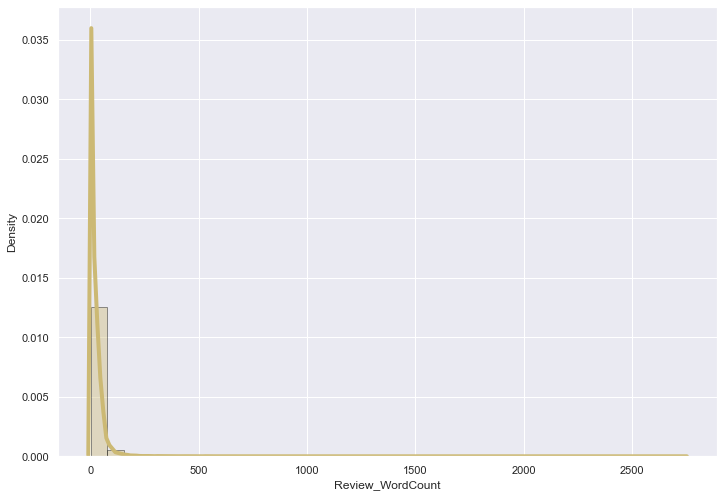

In [43]:
# density plot and histogram of Review word count

sns.distplot(df['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Character Count

In [44]:
# Creating column for character counts in the text

df['Review_ChaCount'] = df['Review'].str.len()
df[['Review_ChaCount','Review']].head()

,Review_ChaCount,Review
0,347,think twice going nbsppros light weight screen...
1,105,overpriced overpriced mediocre product brand v...
2,757,build quality good shown ad meet expectations ...
3,119,speed visuals makes power machine speakers sou...
4,199,overpriced unreliable i th gen laptop way over...


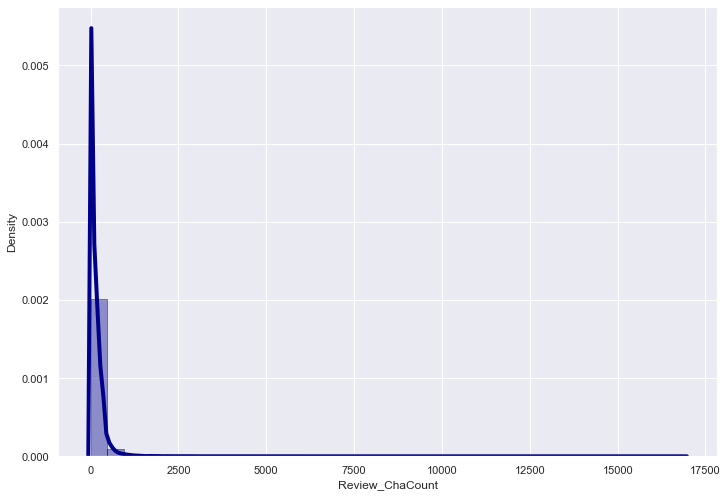

In [45]:
# density plot and histogram of all character count

sns.distplot(df['Review_ChaCount'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

# Removing Outliers

In [46]:
#Checking the shape of the dataset

df.shape

(114491, 4)

In [47]:
# Applying zscore to remove outliers

from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Review_WordCount']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.shape

(112973, 4)

# Plotting histograms for word count and character counts again after removing outliers:

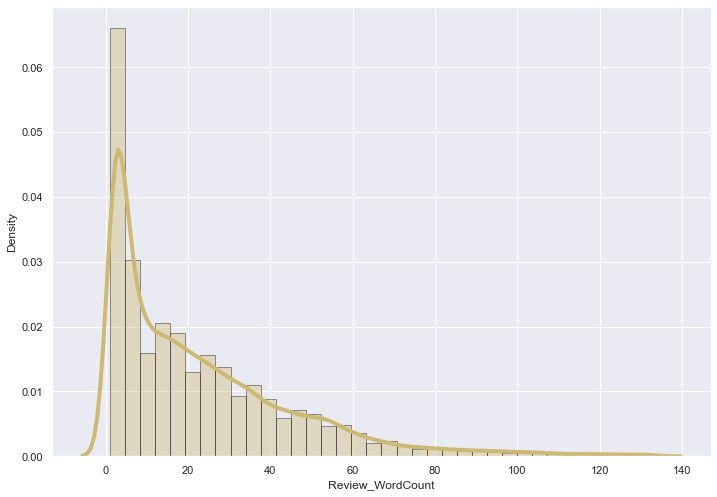

In [48]:
# density plot and histogram of Review word count

sns.distplot(df['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

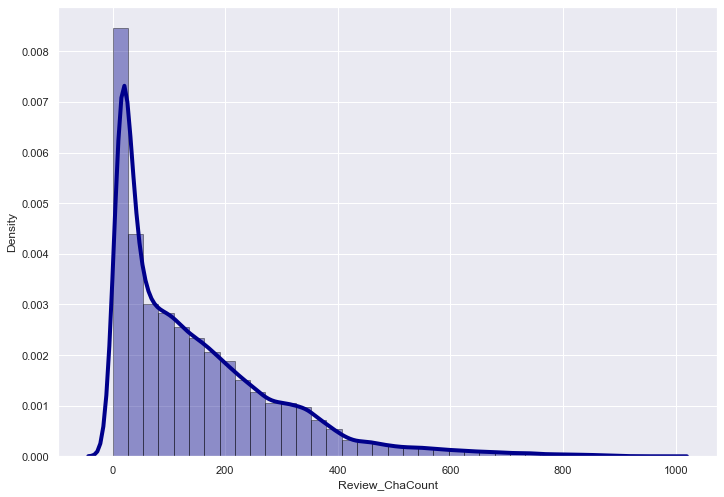

In [49]:
# density plot and histogram of all character count

sns.distplot(df['Review_ChaCount'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

After plotting histograms for word counts and character counts and after removing outliers we can see we are left out with good range of number of words and characters.



In [50]:
#function to plot most frequent terms

def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nlargest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

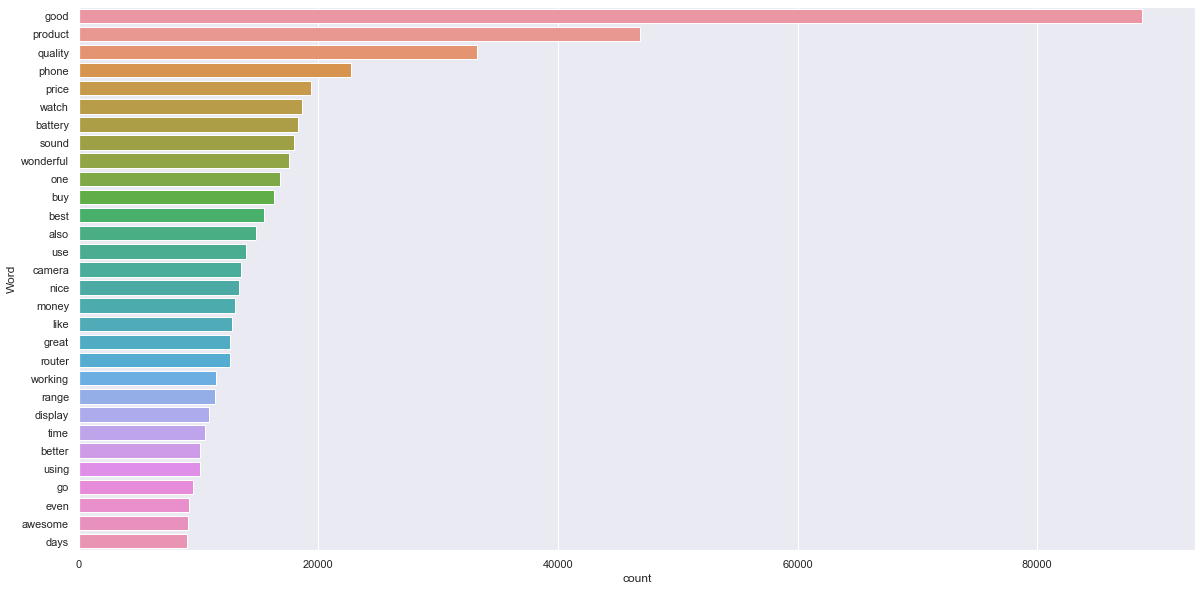

In [51]:
freq_words(df['Review'])

In [52]:
#function to plot least frequent terms

def rare_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nsmallest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

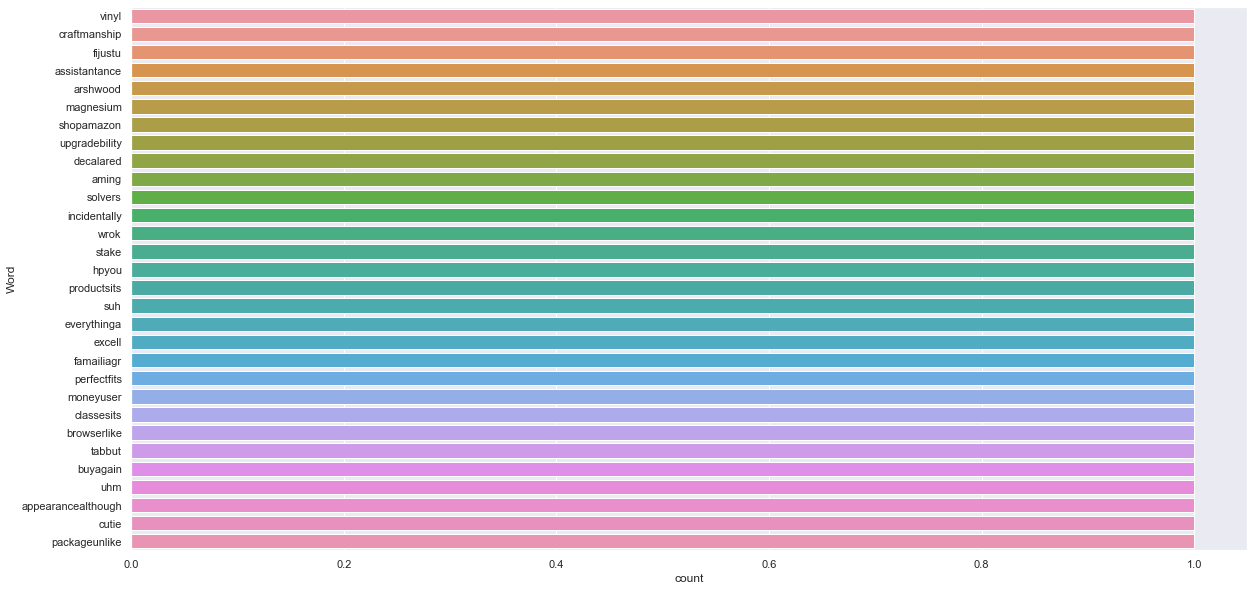

In [53]:
rare_words(df['Review'])

Word Cloud

In [54]:
!pip install WordCloud

In [55]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
                    background_color='white',
                    stopwords = stopwords,
                    max_words = 500,
                    max_font_size = 40,
                    scale = 3,
                    random_state = 1).generate(str(data))
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()


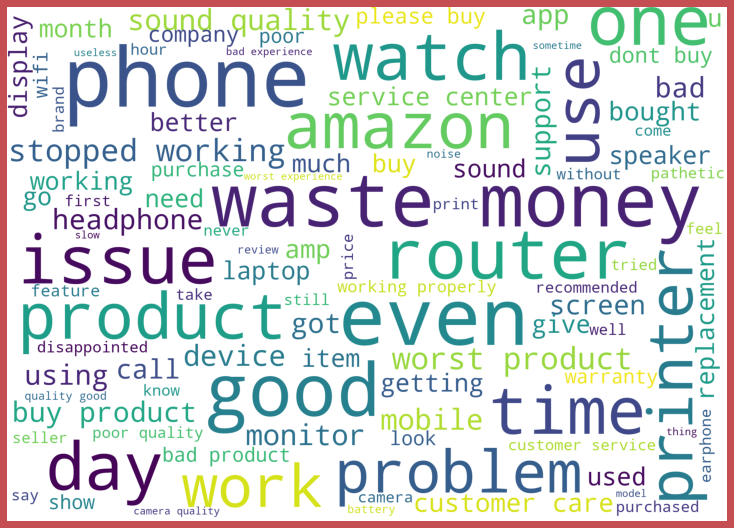

In [56]:
#Let's plot the loud words with Rating 1

from wordcloud import WordCloud

df1=df['Review'][df['Ratings']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

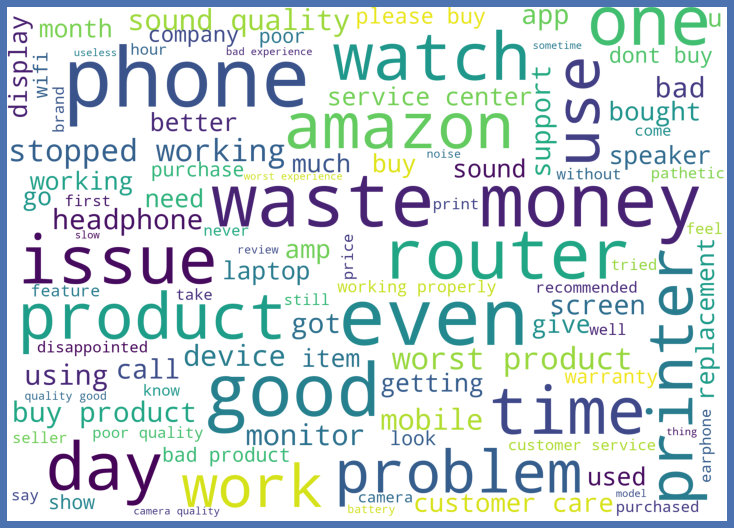

In [57]:
#Let's plot the loud words with Rating 2

from wordcloud import WordCloud

df2=df['Review'][df['Ratings']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

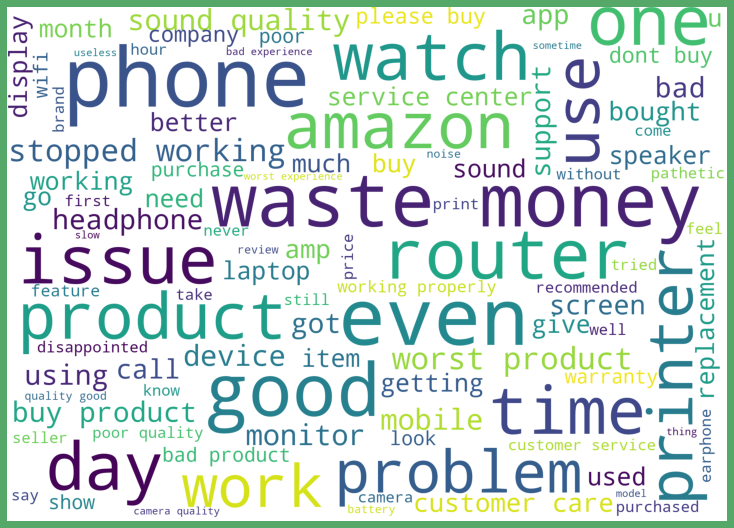

In [58]:
#Let's plot the loud words with Rating 3

from wordcloud import WordCloud

df3=df['Review'][df['Ratings']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

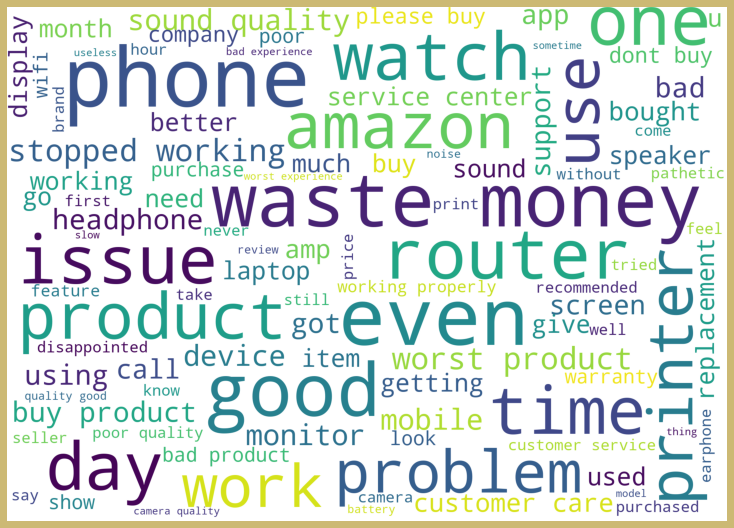

In [59]:
#Let's plot the loud words with Rating 4

from wordcloud import WordCloud

df4=df['Review'][df['Ratings']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='y')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

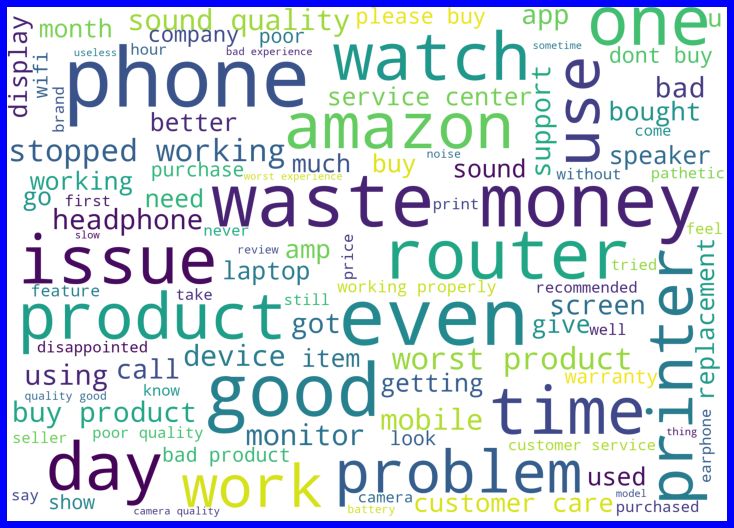

In [60]:
#Let's plot the loud words with Rating 5

from wordcloud import WordCloud

df5=df['Review'][df['Ratings']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='blue')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

Observations:
From the above plots we can clearly see the words which are indication of Reviewer's opinion on products.
Here most frequent words used for each Rating is displayed in the word cloud.


In [61]:
#Checking the value counts of Ratings column

df.Ratings.value_counts()

5    50245
4    20378
1    16687
3    14258
2    11405
Name: Ratings, dtype: int64

# MODEL BUILDING AND EVALUATION

In [62]:
# Separating feature and label

x = df['Review']
y = df['Ratings']

# CONVERTING TEXT DATA INTO VECTORS

In [63]:
#using the n_gram tfidf vectorizer(Word vectors)

from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'word',
                                token_pattern = r'\w{1,}',
                                stop_words = 'english',
                                ngram_range = (1,3),
                                max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

In [64]:
#Character vectorizer

char_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'char',
                                stop_words = 'english',
                                ngram_range = (2,6),
                                max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

In [65]:
#I will combine both word vectors and character vectors as input for our model

from scipy.sparse import hstack
train_features = hstack([train_char_features,train_word_features])

# SPLITTING THE DATA INTO TRAIN AND TEST

In [66]:
# Splitting train and test data

seed = 1
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.25, random_state = seed)

# DATA BALANCING

In [67]:
#lets check the shapes of traning and test data

print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (84729, 150000)
x_test (28244, 150000)
y_train (84729,)
y_test (28244,)


In [68]:
#Checking the value counts of Ratings column

y.value_counts()

5    50245
4    20378
1    16687
3    14258
2    11405
Name: Ratings, dtype: int64

In [69]:
#Checking the number of classes before fit

from collections import Counter
print("The number of classes before fit{}".format(Counter(y_train)))

The number of classes before fitCounter({5: 37733, 4: 15211, 1: 12583, 3: 10674, 2: 8528})


In [70]:
# Oversample and plot imbalanced dataset with SMOTE

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# transforming the dataset
os=SMOTE(sampling_strategy = {1: 37733, 2: 37733, 3: 37733, 4: 37733, 5: 37733})
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)

print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({5: 37733, 4: 15211, 1: 12583, 3: 10674, 2: 8528})
The number of classes after fit Counter({5: 37733, 2: 37733, 3: 37733, 1: 37733, 4: 37733})


In [71]:
!pip install lightgbm

In [72]:
# Importing libraries for ML Algorithms

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [73]:
# defining the algorithms

rf = RandomForestClassifier()
DTC = DecisionTreeClassifier()
svc = LinearSVC()
lr = LogisticRegression(solver='lbfgs')
mnb = MultinomialNB()
bnb = BernoulliNB()
xgb = XGBClassifier(verbosity=0)
lgb = LGBMClassifier()
sgd = SGDClassifier()

In [74]:
#creating a function to train and test the model with evaluation

def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train_ns,y_train_ns)
    y_pred = model.predict(x_train_ns)
    pred = model.predict(x_test)

    accuracy = accuracy_score(y_test,pred)*100

    print(f"Accuracy Score:", accuracy)
    print("---------------------------------------------------")

    #confusion matrix & classification report
    
    print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
    print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")

In [75]:
# Running multiple algorithms

for model in [lr,svc,sgd]:
    BuiltModel(model)

******************************LogisticRegression******************************
Accuracy Score: 73.8599348534202
---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.72      0.79      0.75      4104
           2       0.53      0.51      0.52      2877
           3       0.54      0.56      0.55      3584
           4       0.63      0.66      0.64      5167
           5       0.91      0.86      0.88     12512

    accuracy                           0.74     28244
   macro avg       0.66      0.67      0.67     28244
weighted avg       0.74      0.74      0.74     28244

Confusion Matrix : 
 [[ 3226   491   268    72    47]
 [  659  1462   498   200    58]
 [  381   474  2008   561   160]
 [  126   194   622  3387   838]
 [  107   124   310  1193 10778]]

******************************LinearSVC******************************
Accuracy Score: 76.61804277014586
-----------------------------

# CROSS VALIDATION

In [76]:
# Defning function cross_val to find cv score of models

def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 3).mean()*100
    print("Cross validation score :", scores)

In [77]:
for model in [lr,svc,sgd]:
    cross_val(model)

******************************LogisticRegression******************************
Cross validation score : 58.50339250315994
******************************LinearSVC******************************
Cross validation score : 57.42968726637766
******************************SGDClassifier******************************
Cross validation score : 58.66536560525891


# HYPERPARAMETER TUNING

In [78]:
# let's selects different parameters for tuning

grid_params = {
                'penalty':['l2','l1','elasticnet'],
                'loss':['hinge','squared_hinge'],
                'n_jobs':[-1,1]
                }

In [79]:
# Training the model with the given parameters using GridSearchCV

GCV =  GridSearchCV(sgd, grid_params, cv = 3, verbose=10)
GCV.fit(x_train_ns,y_train_ns)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START loss=hinge, n_jobs=-1, penalty=l2..........................
[CV 1/3; 1/12] END ........loss=hinge, n_jobs=-1, penalty=l2; total time=   4.1s
[CV 2/3; 1/12] START loss=hinge, n_jobs=-1, penalty=l2..........................
[CV 2/3; 1/12] END ........loss=hinge, n_jobs=-1, penalty=l2; total time=   4.3s
[CV 3/3; 1/12] START loss=hinge, n_jobs=-1, penalty=l2..........................
[CV 3/3; 1/12] END ........loss=hinge, n_jobs=-1, penalty=l2; total time=   4.2s
[CV 1/3; 2/12] START loss=hinge, n_jobs=-1, penalty=l1..........................
[CV 1/3; 2/12] END ........loss=hinge, n_jobs=-1, penalty=l1; total time=   5.1s
[CV 2/3; 2/12] START loss=hinge, n_jobs=-1, penalty=l1..........................
[CV 2/3; 2/12] END ........loss=hinge, n_jobs=-1, penalty=l1; total time=   5.1s
[CV 3/3; 2/12] START loss=hinge, n_jobs=-1, penalty=l1..........................
[CV 3/3; 2/12] END ........loss=hinge, n_jobs=-1

GridSearchCV(cv=3, estimator=SGDClassifier(),
             param_grid={'loss': ['hinge', 'squared_hinge'], 'n_jobs': [-1, 1],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             verbose=10)

In [ ]:
# Printing the best parameters found by GridSearchCV

GCV.best_params_

# BEST FIT MODEL

In [ ]:
# Training our final model with above best parameters

model = SGDClassifier(loss = 'squared_hinge', n_jobs = -1, penalty = 'l1')
model.fit(x_train_ns,y_train_ns) #fitting data to model
pred = model.predict(x_test)
accuracy = accuracy_score(y_test,pred)*100

# Printing accuracy score
print("Accuracy Score :", accuracy)

# Printing Confusion matrix
print(f"\nConfusion Matrix : \n {confusion_matrix(y_test,pred)}\n")

# Printing Classification report
print(f"\nCLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")

# SAVING THE MODEL

In [82]:
import joblib
joblib.dump(model,"Ratings_RP.pkl")

['Ratings_RP.pkl']